# The analytic Hamiltonian Nullspace Shuttle in 1D

This educational notebook implements the 1D Hamiltonian Nullspace Shuttle for an analytically defined misfit function. It is intended to illustrate the basic concept of the nullspace shuttle by allowing for easy plotting.


**copyright**: Andreas Fichtner (andreas.fichtner@erdw.ethz.ch), December 2020

**license**: BSD 3-Clause ("BSD New" or "BSD Simplified")

## 1. Import Python packages

We start with the import of Python packages for basic numerical math and plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## 2. Set basic input parameters

In the following, we define input parameters, including the initial model position, the standard deviation of the misfit tolerance, the coordinates in phase space (mostly for plotting), and the leapfrog integration parameters. The selected analytical misfit function will be defined in the subsequent box.

In [2]:
# Initial model.
m_init=0.1

# Probabilistic tolerance.
epsilon=0.5

# Coordinate lines in model and momentum space.
delta=0.1
m_line=np.arange(-15.1,15.1,delta)
p_line=np.arange(-4.1,4.1,delta)

# Leapfrog parameters (number of steps and step length).
nt_total=400
nt_segment=20
dt=0.1

# Misfit function.
function='cycleskip2'

## 3. Define analytic kinetic energy and its derivative.

The following box defines the potential energy $U$, which is equal to the misfit $\chi$, as well as its derivative with respect to the model parameter $m$.

In [3]:
def U(m,function='cycleskip'):
    
    if function=='cycleskip':
        return 1.0-np.cos(m)+0.025*m**2
    
    if function=='cycleskip2':
        return 1.0-np.cos(0.2*m**2)+0.025*m**2
        

def dU(m,function='cycleskip'):
    
    if function=='cycleskip':
        return np.sin(m)+0.05*m
    
    if function=='cycleskip2':
        return 0.2*2.0*m*np.sin(0.2*m**2)+0.05*m

## 4. Leapfrog time stepping.

We solve Hamilton's equations using the leapfrog algorithm. For this, we begin with the initial model, and we choose a random tolerance with standard deviation defined above. Then we compute a trajectory for a number of time steps, defined by the variabel nt_segment. This is then repeated, with a newly drawn tolerance, for additional segments.

In [4]:
# Initial model and momentum.
m=np.zeros(nt_total)
p=np.zeros(nt_total)
m[0]=m_init
p[0]=epsilon*np.random.randn()

# Time stepping.
for n in range(nt_total-1):
    
    p_half=p[n]-0.5*dt*dU(m[n],function)
    m[n+1]=m[n]+dt*p_half
    p[n+1]=p_half-0.5*dt*dU(m[n+1],function)
    
    if np.remainder(n+1,nt_segment)==0.0:
        p[n+1]=epsilon*np.random.randn()

## 5. Plotting.

Finally, we plot trajectories in phase space, as well as potential energy (misfit) as a function of model space position.

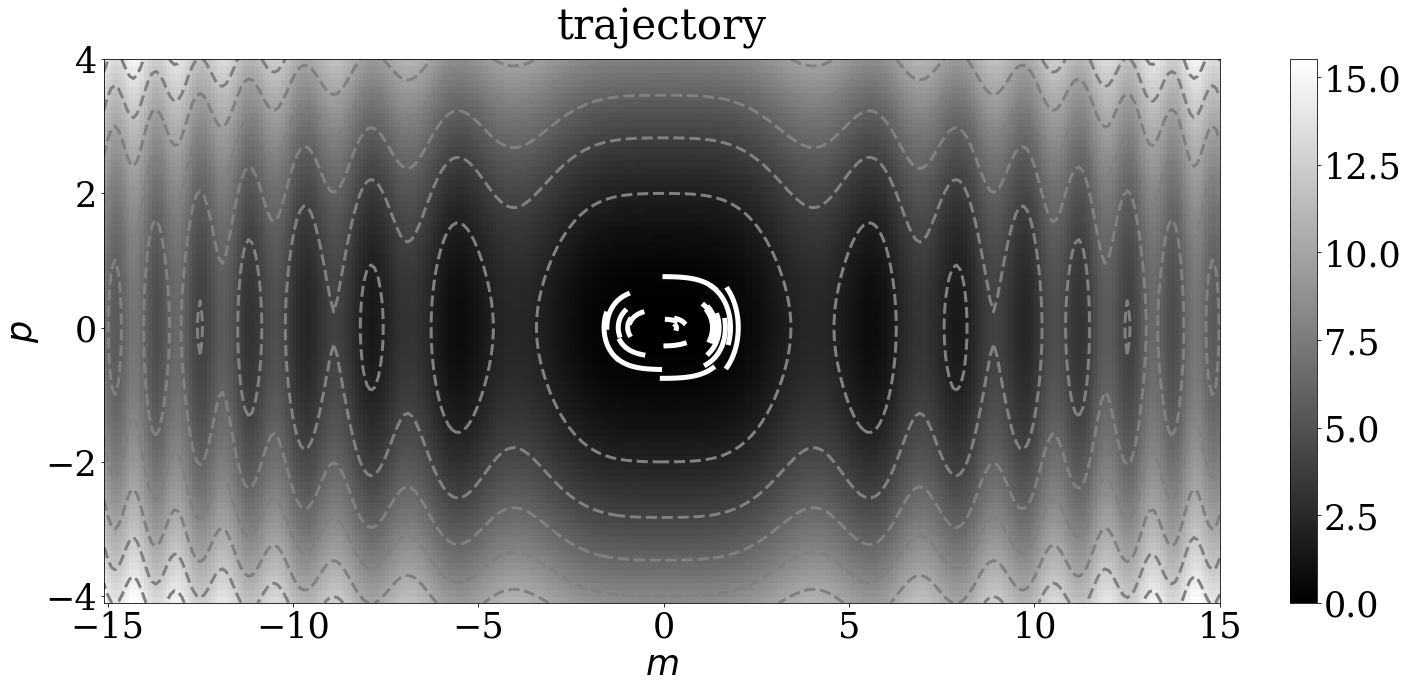

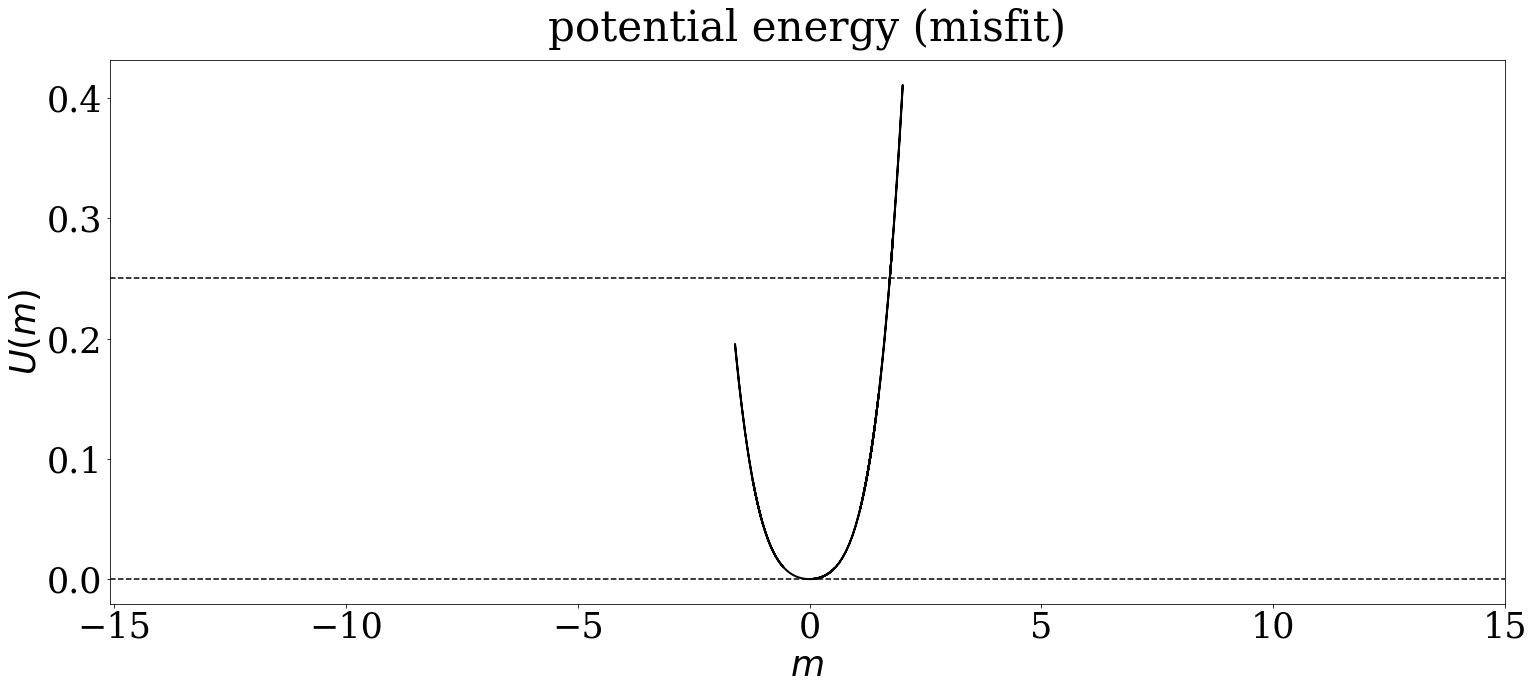

In [5]:
# Set some plotting options.
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 35})

# Plot Hamiltonian surface with superimposed trajectory.
M,P=np.meshgrid(m_line,p_line)
H=0.5*P*P+U(M,function)

plt.subplots(1, figsize=(25,10))
plt.pcolor(M,P,H,cmap=cm.gray)
plt.colorbar()
plt.contour(M,P,H,colors='grey',linewidths=3,linestyles='dashed')

for k in range(int(np.floor(nt_total/nt_segment))):
    plt.plot(m[k*nt_segment:(k+1)*nt_segment],p[k*nt_segment:(k+1)*nt_segment],'w',linewidth=5)

plt.xlabel(r'$m$')
plt.ylabel(r'$p$')
plt.title('trajectory',pad=20)
plt.show()

# Plot potential energy sampled by the shuttle.
U_init=U(m_init,function)

plt.subplots(1, figsize=(25,10))
plt.plot(m,U(m,function),'k',linewidth=2)
plt.plot([m_line[0],m_line[-1]],[U_init,U_init],'k--')
plt.plot([m_line[0],m_line[-1]],[U_init+epsilon**2.0,U_init+epsilon**2.0],'k--')
plt.xlim([m_line[0],m_line[-1]])
plt.xlabel(r'$m$')
plt.ylabel(r'$U(m)$')
plt.title('potential energy (misfit)',pad=20)
plt.show()
